In [1]:
import pandas as pd

csv = pd.read_csv("../Data/bmi.csv")
csv.head()

,height,weight,label
0,187,35,thin
1,144,68,fat
2,172,66,normal
3,156,54,normal
4,128,54,fat


In [2]:
csv['label'].unique()

array(['thin', 'fat', 'normal'], dtype=object)

In [3]:
# > label 의 type이   object이므로 변환 작업이 필요

In [4]:
#결측치
csv.isna().sum()

height    0
weight    0
label     0
dtype: int64

In [5]:
csv.describe()

,height,weight
count,20000.000000,20000.000000
mean,159.626350,57.419150
std,23.292565,13.193164
min,120.000000,35.000000
25%,139.000000,46.000000
50%,160.000000,57.000000
75%,180.000000,69.000000
max,200.000000,80.000000


In [6]:
# data 정규화 하기  데이터가 0~ 1사이로
# weight, height
csv.weight = csv.weight /csv.weight.max()
csv.height = csv.height /csv.height.max()

In [7]:
# label 
bclass = {
    'thin' : [1,0,0],
    'normal' : [0,1,0],
    'fat' : [0,0,1],
}

y = []

for i, v in enumerate(csv['label']):
    y.append(bclass[v])


In [8]:
X_train = csv[['height','weight']][:15000]
y_train =  y[:15000]

In [9]:
y_train[:5]

[[1, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 0, 1]]

In [10]:
#test
X_test = csv[['height','weight']][15000:]
y_test =  y[15000:]

In [11]:
y_test

[[0, 1, 0],
 [0, 1, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 1, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 1, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 1, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 1, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 1, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 1, 0],
 [1, 0, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 1, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 1, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0,

In [12]:
X_test.head()

,height,weight
15000,0.870,0.8500
15001,0.875,0.7750
15002,0.975,0.8375
15003,0.790,0.8875
15004,0.760,0.6750


In [13]:
print(len(X_test))
print(len(y_test))

5000
5000


In [14]:
# Deep Learning Model

# - 입
# - 은 : 512 개의 노드, activation = relu
# - 출 

In [15]:
# Model 생성하기

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input


model = Sequential()

# 입력층
model.add( Input(shape=(2,)) )
# 은익층
model.add(Dense(512, activation='relu'))
# 출력층
model.add(Dense(3  , activation='softmax') ) # sigmoid는 이진분류

model.summary()

model.compile( optimizer='rmsprop',  loss ='categorical_crossentropy', metrics=['accuracy'])


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,075 (12.01 KB)

 Trainable params: 3,075 (12.01 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
import numpy as np
model.fit(
    np.array(X_train),
    np.array(y_train),
    epochs = 50
)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6771 - loss: 0.8401
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9152 - loss: 0.3491
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9605 - loss: 0.2158
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9664 - loss: 0.1654
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9732 - loss: 0.1361
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9721 - loss: 0.1184
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9746 - loss: 0.1050
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9749 - loss: 0.0993
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9760 - loss: 0.0930
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9702 - loss: 0.0923
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9717 - loss: 0.0845
Epoch 12/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

In [17]:
# 테스트 데이터로 평가하기
score = model.evaluate(
    np.array(X_test),
    np.array(y_test)
)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9747 - loss: 0.0539


In [18]:
score

[0.052838653326034546, 0.975600004196167]

In [ ]:
# Keras를 이용한 손글씨 인식 딥러닝
# Data 블러오기
import pandas as pd

train = pd.read_csv("../Data/train_20k.csv",header=None)
train.head()
test = pd.read_csv("../Data/test_1k.csv",header=None)
test.head()


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# 데이터 크기 확인하기
print(train.shape, test.shape)

(20001, 785) (1001, 785)


In [22]:
# 결측치 확인하기
train.isna().sum().sum()
test.isna().sum().sum()

0

In [40]:
# Target의 허용 확인하기
targetCount = []

for i in sorted(train[0].unique()) :
    print(i, ":",len(train[train[0]==i]))
    targetCount.append(len(train[train[0]==i]))

# # data 정규화 하기  데이터가 0~ 1사이로
# # weight, height
# csv.weight = csv.weight /csv.weight.max()
# csv.height = csv.height /csv.height.max()

0 : 1994
1 : 2281
2 : 1929
3 : 2076
4 : 1945
5 : 1776
6 : 1971
7 : 2093
8 : 1922
9 : 2014


In [39]:
import numpy as np
np.min(targetCount) / np.max(targetCount)


0.7786058746163963

In [25]:
train[0].value_counts().min()/train[0].value_counts().max()

0.7786058746163963

In [41]:
# train과 test로 분리하고 정규화 하기
train_label = train.iloc[:,0]  # train.loc[:,train.columns==0]
train_data = train.iloc[:,1:]  # train.loc[:,train.columns!=0]

train_data = train_data/255

test_label = test.iloc[:,0]
test_data = test.iloc[:,1:]
test_data = test_data/255


In [27]:
print(train_label.shape, train_data.shape, test_label.shape, test_data.shape)

(20001,) (20001, 784) (1001,) (1001, 784)


In [42]:

# Model 생성하기

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input


model = Sequential()

# 입력층
model.add( Input(shape=(784,)) )
# 은익층
model.add(Dense(512, activation='relu'))
# 출력층
model.add(Dense(10, activation='softmax') ) # sigmoid는 이진분류

model.summary()

model.compile( optimizer='adam',  loss ='sparse_categorical_crossentropy', metrics=['accuracy'])


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
import numpy as np
model.fit(
    np.array(train_data),
    np.array(train_label),
    epochs = 10
)

Epoch 1/10
626/626 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8516 - loss: 0.5182
Epoch 2/10
626/626 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9603 - loss: 0.1399
Epoch 3/10
626/626 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9785 - loss: 0.0744
Epoch 4/10
626/626 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9845 - loss: 0.0538
Epoch 5/10
626/626 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9915 - loss: 0.0305
Epoch 6/10
626/626 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9931 - loss: 0.0236
Epoch 7/10
626/626 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9915 - loss: 0.0282
Epoch 8/10
626/626 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9977 - loss: 0.0113
Epoch 9/10
626/626 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9987 - loss: 0.0063
Epoch 10/10
626/626 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9980 - loss: 0.0090


In [44]:
# 테스트 데이터로 평가하기 
model.evaluate(
    test_data,
    test_label
)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9735 - loss: 0.0816


[0.10452840477228165, 0.9700299501419067]

In [46]:
#
pred = model.predict(test_data)

print("test label :", test_label[:10])
print("_______________")
print("pred:",np.argmax(pred[:10],axis=1))


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
test label : 0    7
1    2
2    1
3    0
4    4
5    1
6    4
7    9
8    5
9    9
Name: 0, dtype: int64
_______________
pred: [7 2 1 0 4 1 4 9 6 9]


In [47]:
### 번외 : Image만들기
from PIL import Image

train.shape

(20001, 785)

In [48]:
# 0번의 정답응 제외한 데이터 만들기
train1 = train.loc[:,train.columns !=0]
train1.shape

(20001, 784)

In [49]:
# train1의 50번의 크기 조절
abc = np.array(train1.iloc[50]).reshape(28,28)
abc.shape

(28, 28)

In [50]:
Image = Image.fromarray((abc).astype(np.uint8))
Image

In [51]:
#image 저장하기
Image.save("../Data/mnist_test_3.jpg","JPEG")

In [37]:
# 이미지를 불러서 Predict 해보기

In [54]:
# Image 블러오기
img = Image.open("../Data/mnist_test_3.jpg")
img

AttributeError: 'Image' object has no attribute 'open'

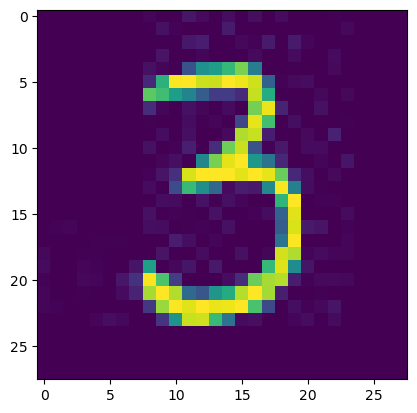

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [ ]:
# image를 numpy 배열로 변환
imgArray = np.array(img)
imgArray = imgArray/255
imgArray.shape

(28, 28)

In [ ]:
# image를 1차원 배열로 변경
imgArray2 = imgArray.reshape(-1)
imgArray2.shape

(784,)

In [ ]:
np.argmax(model.predict(imgArray2),axis=1)

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None
  • kwargs=<class 'inspect._empty'>

In [ ]:
imgArray3 = imgArray2.tolist()
dfArray = pd.DataFrame(imgArray3)
dfArray = dfArray.T
dfArray

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011765,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
np.argmax(model.predict(dfArray),axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


array([0], dtype=int64)